In [1]:
from sklearn.manifold import TSNE
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open('vocab.txt', 'r')
vocab = {}
vocab_length = 0
for line in f.readlines():
    line = line.split()
    if not line:
        continue
    if len(line) == 1:
        vocab[''] = int(line[0])
        continue
    
#     print(line)
    
    vocab[line[0]] = int(line[1])
    vocab_length += 1
print('done')
f.close()

done


In [3]:
print(len(vocab))
print(vocab['camera'])

725949
2455


In [4]:
f = open('embedding_cbow.txt') 
embedding = np.zeros((vocab_length+1, 10))
embed = []
v = 0
for line in f.readlines():
    line = line.strip()
#     print(line[-1])
    if not line:
        continue
    if line[0] == '[':
        embed = []
        line = line.lstrip('[')
        line = line.split()
        for w in line:
            if not w:
                continue
            else:
                embed.append(float(w))
    elif line[-1] == ']':
        line = line.rstrip(']')
        line = line.split()
        for w in line:
            if not w:
                continue
            else:
                embed.append(float(w))
#         print(len(embed))
        embedding[v] = embed
        v += 1
        if v ==725949:
            break
    else:
        line = line.strip()
        line = line.split()
        for w in line:
            if not w:
                continue
            else:
                embed.append(float(w))
        
print(v)    

print('done')

725949
done


In [5]:
print(embedding[vocab['camera']])

[0.00263927 0.34710645 0.6757347  0.12504997 0.44947283 0.59529768
 0.0868258  0.44566208 0.09204656 0.9468419 ]


In [76]:
f = open('embedsgns.txt')
lines = f.readlines()
embed = lines[0].strip('[]').split('[')
words = lines[1].strip('[]').split(',')
for w in range(len(words)):
    words[w] = words[w].strip()
    words[w] = words[w].strip("\'")
    
# print(words)
ind = 0
embedding = {}
for e in embed:
    e = e.strip()
    e = e.rstrip(',')
    e = e.strip()    
    e = e.rstrip(']')
    e = e.strip()
    e = e.split(',')
    embeddings = []
    for w in e:
        embeddings.append(float(w))
    
    embedding[words[ind]] = embeddings
    ind += 1
#     print(e)
    


In [77]:
print(embedding['camera'])

[-0.8721921435710075, -0.35906806397692914, 0.0831793604542305, 0.27593813162488456, 0.009394766074227727]


In [124]:
import numpy as np
b = np.load('embedcbow.npy')
print(np.shape(b))

(8567, 5)


In [14]:
def get_sim(word):
    similarity = {}
    a = embedding[vocab[word]]
    for w in vocab:
        b = embedding[vocab[w]]
        cos_sim = np.dot(a, b)/(norm(a)*norm(b))
        similarity[w] = cos_sim
#     for w in similarity:
#         print(w, similarity[w])
    ans = [k for k, v in sorted(similarity.items(), key=lambda item: item[1], reverse=True)]
    l = 0
    vec = []
    emb = []
    sim = []
    for w in ans:
        if l == 10:
            break
        if w == 'BEGIN' or w == 'END':
            pass
        else:
            l += 1
            vec.append(w)
            emb.append(embedding[vocab[w]])
            sim.append(similarity[w])
    return vec, emb, sim

In [23]:
vect, X, simi = get_sim('camera')
for y in range(10):
    print(vect[y], simi[y])


camera 1.0
misconstruing 0.9910748515703022
automatucally 0.9881420377994826
failutre 0.9867764549196054
lifelogitech 0.9857014008041985
netback 0.985327237040698
b00585clsq 0.9833822802173674
optionnal 0.98180329673453
no-fills 0.981604319962775
betwene 0.9809129882287108


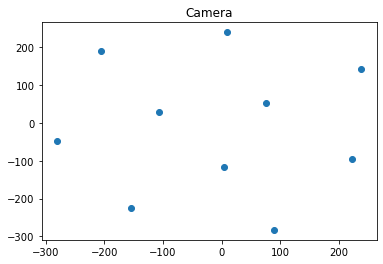

In [24]:

X_embedded = TSNE(n_components=2).fit_transform(X)

xtarget=[]
ytarget=[]
for i in X_embedded:    
    xtarget.append(i[0])
    ytarget.append(i[1])
    
plt.scatter(xtarget,ytarget)
plt.title("Camera")
plt.show()